# Segmentación de Especies con Cluster Analysis

El conjunto de datos de la flor **Iris** es uno de los más populares para el Aprendizaje de Máquina (ML).  Si no lo conocen, pueden leer sobre él en:

https://en.wikipedia.org/wiki/Iris_flower_data_set

El conjunto de datos *iris.csv* tiene cuatro variables:  

* **sepal length** (longitud del sépalo), 
* **sepal width** (ancho del sépalo), 
* **petal length** (longitud del pétalo), 
* **petal width** (ancho del pétalo).

**SECCIÓN 1:**

1. Visualicen los datos para ver si pueden detectar algunos grupos. **Ayuda:**   utilicen la forma del sépalo:

2. Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados.  

3. Estandaricen los datos e intenten el paso 2, de nuevo.  ¿Qué diferencias hay, si es que lo hay?

4. Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un rango de 1 a 10)

5. Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos 3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.

6. Comparen sus soluciones con los datos reales, archivo: *iris-con-respuestas.csv*

**Obviamente solo hay tres especies, porque ese es el archivo de datos reales!**

¿Funcionó el clustering con la forma del sépalo?

**Sección 2:**

Repitan el proceso pero ahora utilizando la forma del pétalo.  Respondan a las mismas preguntas


**Sección 3:**

Utilicen la librería "kneed" y vean si el resultado coincide con el método del "codo" que hicieron manualmente.  ¿A que podría deberse la diferencia, si la hay?  ¿Les dió el número correcto de clusters, comparado a los datos reales?  

Basado en los resultado que tuvieron, ¿A qué conclusiones llegaron?


### Sección 1

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

- Visualización de datos

In [2]:
data = pd.read_csv('iris.csv')

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot: xlabel='sepal_width', ylabel='sepal_length'>

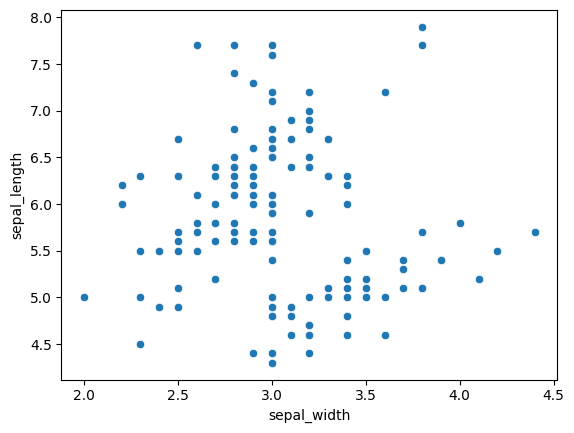

In [5]:
sns.scatterplot(data=data, x='sepal_width', y="sepal_length")

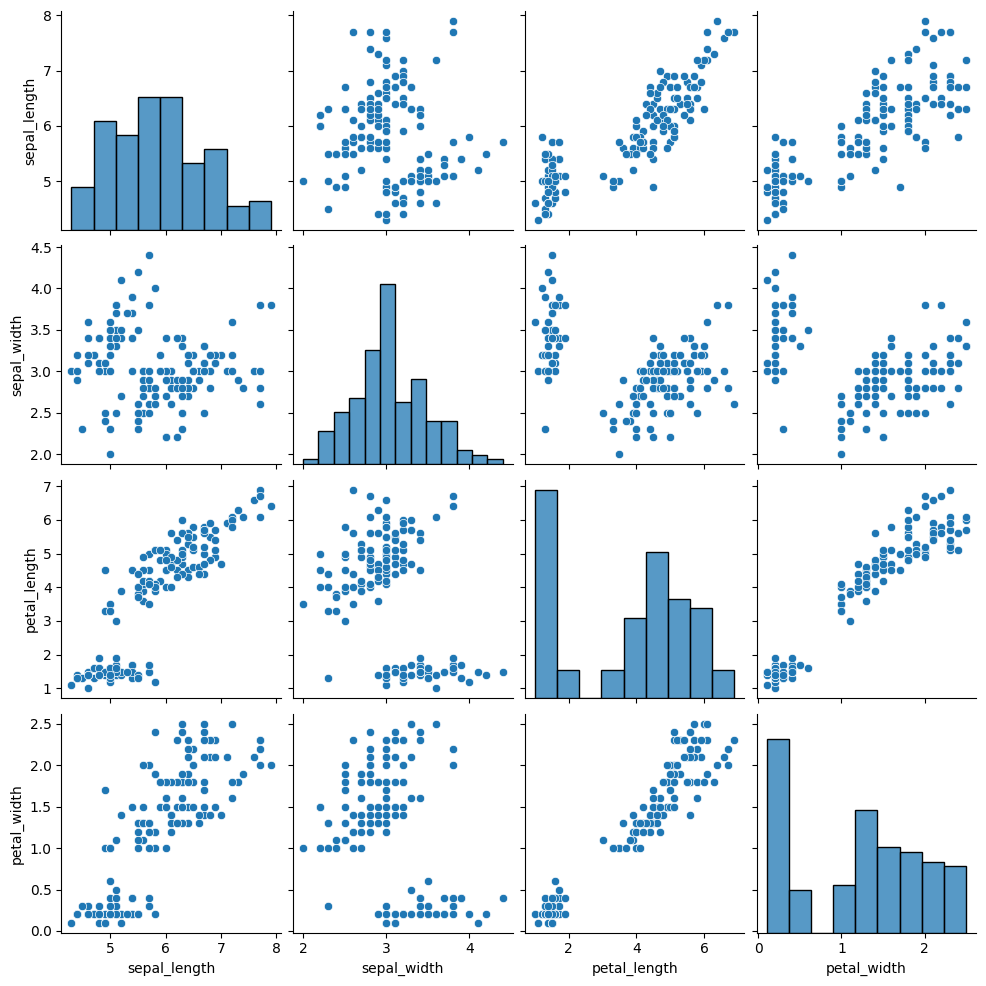

In [6]:
sns.pairplot(data)

<AxesSubplot: >

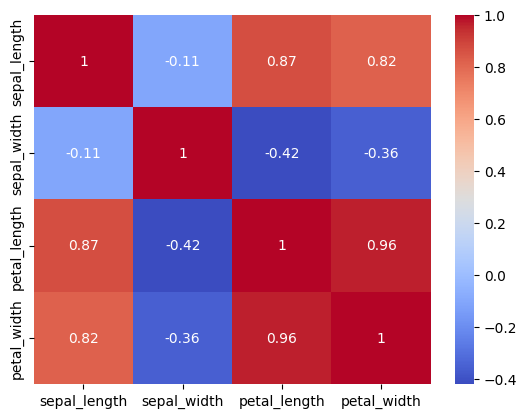

In [7]:
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)

En general podemos observar que la data se divide en 2 grupos principales, por lo mismo para este caso utilizaremos dos clusters para realizar las agrupaciones y categorizaciones.

- Creación de clusters

In [8]:
x = data.filter(["sepal_width", "sepal_length"])
x

,sepal_width,sepal_length
0,3.5,5.1
1,3.0,4.9
2,3.2,4.7
3,3.1,4.6
4,3.6,5.0
...,...,...
145,3.0,6.7
146,2.5,6.3
147,3.0,6.5
148,3.4,6.2


In [9]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [10]:
clusters_identificados = kmeans.fit_predict(x)
clusters_identificados

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

In [11]:
def graficar (cluster,data,X,Y):
    datos_con_clusters = data.copy()
    datos_con_clusters['Cluster'] = cluster

    datos_con_clusters["Cluster"] = datos_con_clusters["Cluster"].astype("category")

    fig = px.scatter(datos_con_clusters, 
                 x = X, 
                 y = Y, 
                 color = "Cluster",
                )
    fig.show()


graficar(clusters_identificados,data,'sepal_width','sepal_length')

- Estandarización de datos

In [12]:
normal = StandardScaler()
normalized = normal.fit_transform(data)
normalized = pd.DataFrame(normalized)
normalized.columns = data.columns
normalized

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [13]:
X = normalized.filter(['sepal_length', 'sepal_width'])
X

,sepal_length,sepal_width
0,-0.900681,1.032057
1,-1.143017,-0.124958
2,-1.385353,0.337848
3,-1.506521,0.106445
4,-1.021849,1.263460
...,...,...
145,1.038005,-0.124958
146,0.553333,-1.281972
147,0.795669,-0.124958
148,0.432165,0.800654


In [14]:
kmeans = KMeans(2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [15]:
clusters_identificados_estand = kmeans.fit_predict(X)
clusters_identificados_estand

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [16]:
graficar(clusters_identificados_estand, normalized,'sepal_width','sepal_length')

¿Qué diferencias hay, si es que lo hay?

-> Como se puede observar, en este caso, no existe mayor diferencia entre ambas implementaciones. Esto se debe principalmente a que la data utilizada los datos tenían un valor parecido u homogénea; en donde no hay valores dominantes que puedan afectar los resultados del clustering.

- Método del "codo"

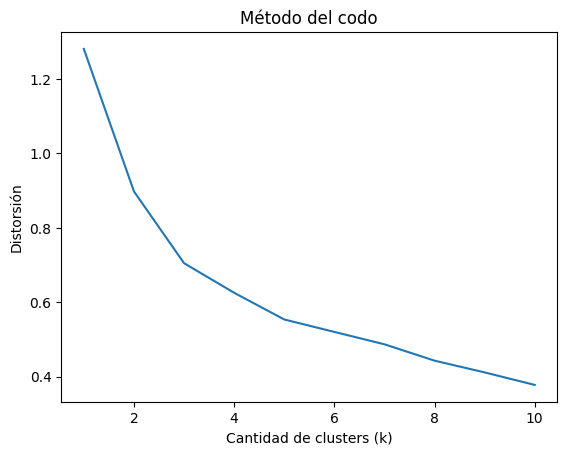

In [17]:
distortions = []
K = range(1,11)

for cant in K:
    kmeanModel = KMeans(n_clusters=cant).fit(X)
    kmeanModel.fit(X)

    # Calculo de las distancias euclidianas
    distances = np.array([np.linalg.norm(X - kmeanModel.cluster_centers_[i], axis=1) for i in range(cant)])
    distortion = np.sum(np.min(distances, axis=0)) / X.shape[0] # Obtener promedio
    distortions.append(distortion)

# Graficar
plt.plot(K, distortions)
plt.xlabel('Cantidad de clusters (k)')
plt.ylabel('Distorsión')
plt.title('Método del codo')
plt.show()



La distorsión de los datos nos permite identificar qué tan dispersos están los puntos dentro de cada cluster respecto a su centroide. Por lo mismo, mediante la gráfica podemos observar que a partir de los tres clusters la distorsión de los datos reduce significativamente. 

Pruebas con más clusters 

In [18]:
from sklearn.cluster import KMeans
for i in range(3,6):# Prueba con 3, 4 y 5 clusters
    kmeans = KMeans(i)
    kmeans.fit(X)
    
    clusters_identificados_estand = kmeans.fit_predict(X)
    graficar(clusters_identificados_estand,data,'sepal_width','sepal_length')

Comparación con iris-con-respuestas

In [43]:
datos = pd.read_csv('iris-con-respuestas.csv')

In [20]:
dummies_type = pd.get_dummies(datos['species'])


# Concatenar a dataframe
datos = pd.concat([datos, dummies_type], axis=1)

# Eliminar columnas anteriores
datos = datos.drop('species', axis=1)

X= datos
print(datos)

     sepal_length  sepal_width  petal_length  petal_width  setosa  versicolor  \
0             5.1          3.5           1.4          0.2       1           0   
1             4.9          3.0           1.4          0.2       1           0   
2             4.7          3.2           1.3          0.2       1           0   
3             4.6          3.1           1.5          0.2       1           0   
4             5.0          3.6           1.4          0.2       1           0   
..            ...          ...           ...          ...     ...         ...   
145           6.7          3.0           5.2          2.3       0           0   
146           6.3          2.5           5.0          1.9       0           0   
147           6.5          3.0           5.2          2.0       0           0   
148           6.2          3.4           5.4          2.3       0           0   
149           5.9          3.0           5.1          1.8       0           0   

     virginica  
0         

In [21]:
kmeans = KMeans(3)
kmeans.fit(X)
clusters_identificados = kmeans.fit_predict(X)
clusters_identificados

datos_con_clusters = datos.copy()
datos_con_clusters['Cluster'] = clusters_identificados
datos_con_clusters

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica,Cluster
0,5.1,3.5,1.4,0.2,1,0,0,0
1,4.9,3.0,1.4,0.2,1,0,0,0
2,4.7,3.2,1.3,0.2,1,0,0,0
3,4.6,3.1,1.5,0.2,1,0,0,0
4,5.0,3.6,1.4,0.2,1,0,0,0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1,2
146,6.3,2.5,5.0,1.9,0,0,1,2
147,6.5,3.0,5.2,2.0,0,0,1,2
148,6.2,3.4,5.4,2.3,0,0,1,2


In [42]:
graficar(clusters_identificados, X, 'sepal_length', 'sepal_width')

¿Funcionó el clustering con la forma del sépalo?

-> Como se puede observar en los gráficos generados nuestra implementación del sépalo difiere en cuanto a la cantidad de datos que cada cluster almacena puesto a que en el gráfico de las respuestas se puede observar que cada cluster tiene una forma como alargada mientras que en nuestra implementación dos de ellos se encuentran como de forma circular esta variación se puede deber a que en el segundo dataset se tomó en cuenta la columna species. 

### Sección 2

- Creación de clusters

In [50]:
x = data.filter(["petal_width", "petal_length"])
x

,petal_width,petal_length
0,0.2,1.4
1,0.2,1.4
2,0.2,1.3
3,0.2,1.5
4,0.2,1.4
...,...,...
145,2.3,5.2
146,1.9,5.0
147,2.0,5.2
148,2.3,5.4


In [51]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [54]:
clusters_identificados = kmeans.fit_predict(X)
clusters_identificados

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [55]:
graficar(clusters_identificados, data, 'petal_width','petal_length')

- Estandarización de datos

In [27]:
normalized

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [28]:
X = normalized.filter(['petal_length', 'petal_width'])
X

,petal_length,petal_width
0,-1.341272,-1.312977
1,-1.341272,-1.312977
2,-1.398138,-1.312977
3,-1.284407,-1.312977
4,-1.341272,-1.312977
...,...,...
145,0.819624,1.447956
146,0.705893,0.922064
147,0.819624,1.053537
148,0.933356,1.447956


In [29]:
kmeans = KMeans(2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [30]:
clusters_identificados_estand = kmeans.fit_predict(X)
clusters_identificados_estand

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [31]:
graficar(clusters_identificados_estand, normalized, 'petal_width', 'petal_length' )

¿Qué diferencias hay, si es que lo hay?

-> Como se puede ver en los dos gráficos anteriores no existe mayor diferencia entre implementacion. Esto se puede deber a que igual que con el sépalo los datos se pueden encontrar homogéneos y/o bastantes parecidos; por ende se puede decir que no hay valores dominantes que puedan afectar los resultados del clustering.  Únicamente, cabe resaltar que este difiere en un punto del cluster 0 que se junta con el cluster 1 

Método del "codo"

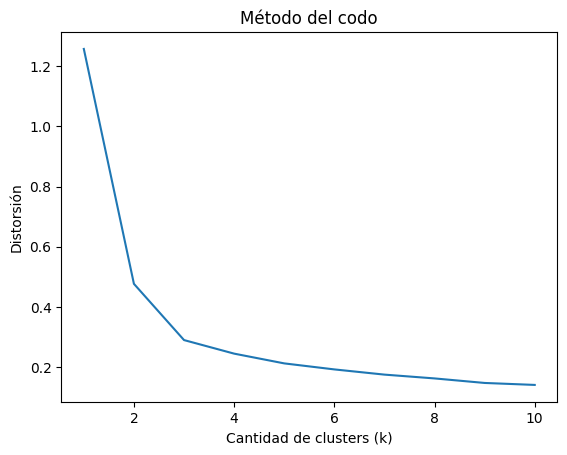

In [32]:
distortions = []
K = range(1,11)

for cant in K:
    kmeanModel = KMeans(n_clusters=cant).fit(X)
    kmeanModel.fit(X)

    # Calculo de las distancias euclidianas
    distances = np.array([np.linalg.norm(X - kmeanModel.cluster_centers_[i], axis=1) for i in range(cant)])
    distortion = np.sum(np.min(distances, axis=0)) / X.shape[0] # Obtener promedio
    distortions.append(distortion)

# Graficar
plt.plot(K, distortions)
plt.xlabel('Cantidad de clusters (k)')
plt.ylabel('Distorsión')
plt.title('Método del codo')
plt.show()


Mediante el gráfico anterior se puede observar que a partir de los tres clusters la distorsión de los datos reduce significativamente. 

Pruebas con más clusters

In [33]:
from sklearn.cluster import KMeans
for i in range(3,6):# Prueba con 3, 4 y 5 clusters
    kmeans = KMeans(i)
    kmeans.fit(X)
    
    clusters_identificados_estand = kmeans.fit_predict(X)
    graficar(clusters_identificados_estand,data,'petal_width', 'petal_length')

Comparación con iris-con-respuestas

In [37]:
right = pd.read_csv('iris-con-respuestas.csv')

In [44]:
dummies_type = pd.get_dummies(right['species'])


# Concatenar a dataframe
right = pd.concat([right, dummies_type], axis=1)

# Eliminar columnas anteriores
right = right.drop('species', axis=1)

X= right
print(right)

     sepal_length  sepal_width  petal_length  petal_width  setosa  versicolor  \
0             5.1          3.5           1.4          0.2       1           0   
1             4.9          3.0           1.4          0.2       1           0   
2             4.7          3.2           1.3          0.2       1           0   
3             4.6          3.1           1.5          0.2       1           0   
4             5.0          3.6           1.4          0.2       1           0   
..            ...          ...           ...          ...     ...         ...   
145           6.7          3.0           5.2          2.3       0           0   
146           6.3          2.5           5.0          1.9       0           0   
147           6.5          3.0           5.2          2.0       0           0   
148           6.2          3.4           5.4          2.3       0           0   
149           5.9          3.0           5.1          1.8       0           0   

     virginica  
0         

In [45]:
kmeans = KMeans(3)
kmeans.fit(X)
clusters_identificados = kmeans.fit_predict(X)
clusters_identificados

datos_con_clusters = datos.copy()
datos_con_clusters['Cluster'] = clusters_identificados
datos_con_clusters

,sepal_length,sepal_width,petal_length,petal_width,species,Cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [46]:
graficar(clusters_identificados, data, 'petal_width', 'petal_length')

¿Funcionó el clustering con la forma del petal?

Como se puede observar ambos gráficos en esencia son muy similares únicamente difieren en tres puntos en el dos clusters. Por otra parte, se puede ver que cada cluster hace su distribución de forma diferente y por ende esta variación puede deberse a ello. Finalmente, se puede decir que el clustering con la forma petal funcionó de forma más exacta y certera. 

### Sección 3

In [38]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(normalized)
    inertia.append(kmeans.inertia_)


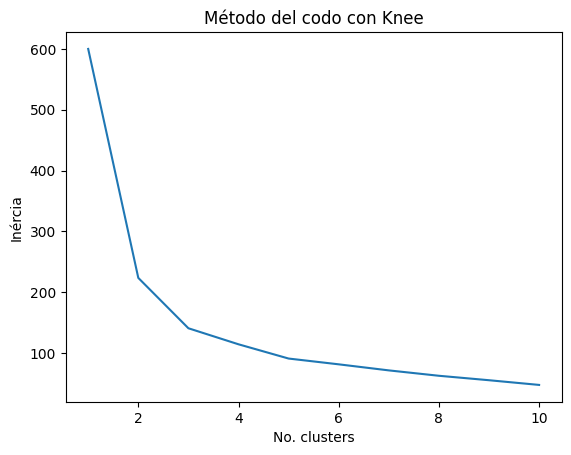

In [39]:
plt.plot(range(1, 11), inertia)
plt.title('Método del codo con Knee')
plt.xlabel('No. clusters')
plt.ylabel('Inércia')
plt.show()


In [40]:
kneedle = KneeLocator(range(1, 11), inertia, curve='convex', direction='decreasing')
print(kneedle.knee)

3


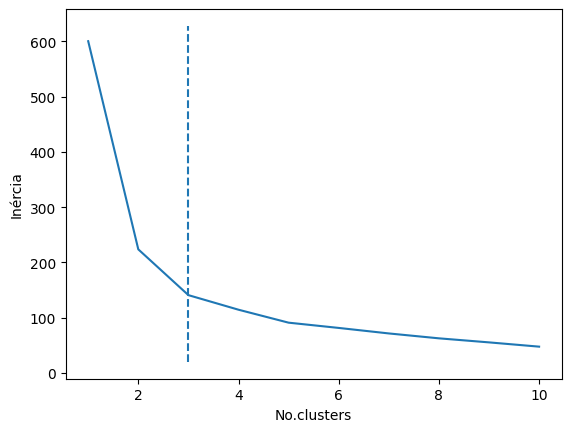

In [41]:
plt.plot(range(1, 11), inertia)
plt.xlabel('No.clusters')
plt.ylabel('Inércia')
plt.vlines(kneedle.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()


¿A que podría deberse la diferencia, si la hay?  

No hubo diferencia pues se obtuvo el mismo resultado de número de clusters utilizando la librería "kneed" y con la implementación manual.

¿Les dió el número correcto de clusters, comparado a los datos reales?

Si, la cantidad de clusters obtenidos por medio de Knee es la misma a la de los datos reales puesto a que en ambos se obtuvo un valor de 3 clusters 

Basado en los resultado que tuvieron, ¿A qué conclusiones llegaron?

Después de analizar los resultados, se puede concluir que el método del codo puede llegar a ser realmente útil para seleccionar la cantidad de clusters que sean necesarios según nuestra data. Sin embargo, no hay que olvidar que lo más importante de éste método es saber interpretar y explicar qué representan los clusters resultantes. 

En general, se obtuvieron resultados sumamente acertados logrando concluir que el modelo implementado puede realizar una segmentación de especies bastante acertada.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f96f9230-ca0e-4d20-814e-c80cb78e9e32' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>